In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv('student_performance_updated_1000.csv')
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [29]:
inputs = df[['AttendanceRate','StudyHoursPerWeek']]
inputs.head()

,AttendanceRate,StudyHoursPerWeek
0,85.0,15.0
1,90.0,20.0
2,78.0,10.0
3,92.0,25.0
4,NaN,18.0


In [35]:
inputs.loc[:,'AttendanceRate'] = inputs['AttendanceRate'].fillna(inputs['AttendanceRate'].mean())
inputs.loc[:,'StudyHoursPerWeek'] = inputs['StudyHoursPerWeek'].fillna(inputs['StudyHoursPerWeek'].mean())
inputs.head()

,AttendanceRate,StudyHoursPerWeek
0,85.000000,15.0
1,90.000000,20.0
2,78.000000,10.0
3,92.000000,25.0
4,85.510417,18.0


In [36]:
Y = df['FinalGrade']
Y = Y.fillna(Y.mean())
Y.head()

0    80.0
1    87.0
2    68.0
3    92.0
4    85.0
Name: FinalGrade, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(inputs,Y,test_size=0.2)
len(X_train)

800

In [38]:
len(X_test)

200

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [53]:
model.coef_
#The linear coefficients are very small signalling no linear co-relation between final grade and features

array([-0.04517335,  0.02932076])

In [43]:
model.intercept_

np.float64(83.09996023368818)

In [52]:
from sklearn.metrics import mean_squared_error
y_test_pred = model.predict(X_test)
mse = mean_squared_error(Y_test,y_test_pred)
mse

81.42975463218968

In [47]:
df[['AttendanceRate', 'StudyHoursPerWeek', 'FinalGrade']].corr()

,AttendanceRate,StudyHoursPerWeek,FinalGrade
AttendanceRate,1.000000,0.019885,-0.014768
StudyHoursPerWeek,0.019885,1.000000,0.036394
FinalGrade,-0.014768,0.036394,1.000000


In [54]:
model.score(X_test,Y_test)
#The value of R squared is coming in negative meaning that it is perofrming worse than predicting on the basis of only mean

-0.02701648716922178

Text(0, 0.5, 'Final Grade')

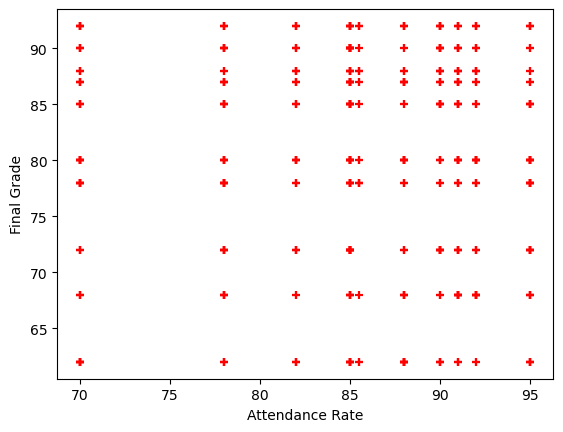

In [49]:
plt.scatter(inputs['AttendanceRate'],Y,color='red',marker='+')
plt.xlabel('Attendance Rate')
plt.ylabel('Final Grade')

Text(0, 0.5, 'Final Grade')

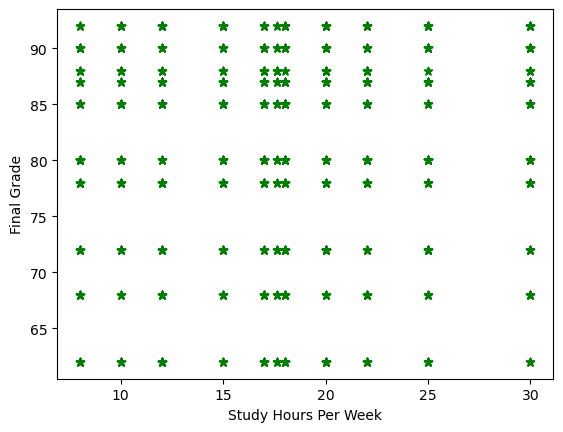

In [50]:
plt.scatter(inputs['StudyHoursPerWeek'],Y,color='green',marker='*')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Final Grade')

In [55]:
#We can clearly see non linear relationship between Final grade and both the features, there is no single best fit line so no linear regression
#If we add other features in csv such as Previous Grade, extracurriculars then the model can improve significantly